In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# custom formatting
from figure_formatting import figure_formatting as ff

ff.set_formatting()

A reaction with stoichiometry 2A + C $\longrightarrow$ D has the following mechanism:

\begin{equation}
2\mathrm{A} \overset{k_1}{\longrightarrow} \mathrm{B}
\end{equation}

\begin{equation}
2\mathrm{B} + \mathrm{C} \overset{k_2}{\longrightarrow} \mathrm{D}
\end{equation}


with rate constants $k_1$ = 0.05 M<sup>&minus;1</sup> s<sup>&minus;1</sup> and $k_2$ = 0.1 M<sup>&minus;1</sup> s<sup>&minus;1</sup>.

The reaction is carried out with initial conditions $[\mathrm{A}]_0$ = 5 M; $[\mathrm{C}]_0$ = 1 M; $[\mathrm{B}]_0$ = 0 M; $[\mathrm{D}]_0$ = 0 M.

**c)** Construct a numerical simulation (e.g., using Excel or Python) to ﬁnd the time at which $[\mathrm{B}]$ is a maximum (it is within the ﬁrst 10 s).


In [2]:
# Start by defining functions to calculate the rates of change of [A], [B], [C], and [D].
# Each function corresponds to one rate equation written down in part (a).

def dA_by_dt(A, k1):
    return -2*k1*A**2

def dB_by_dt(A, B, C, k1, k2):
    return k1*A**2 - k2*B*C

def dC_by_dt(B, C, k2):
    return -k2*B*C

def dD_by_dt(B, C, k2):
    return k2*B*C

In [3]:
# Set up the simulation.

A0 = 5
C0 = 1
B0 = 0
D0 = 0

k1 = 0.05
k2 = 0.1

t = 0.0

dt = 0.001 # timestep

# Initialise the concentrations of A, B, C, and D to their starting values
A = A0
B = B0
C = C0
D = D0

# Create lists to store the calculated concentrations for plotting later
A_stored = [A]
B_stored = [B]
C_stored = [C]
D_stored = [D]
t_stored = [t]

simulation_time = 10.0

# Main simulation loop.
while t < simulation_time:
    # Predict the concentrations of A, B, C, and D at the next timestep (t + dt)
    # These correspond to the equations written down in part (b).
    A_t_plus_dt = A + dA_by_dt(A, k1) * dt
    B_t_plus_dt = B + dB_by_dt(A, B, C, k1, k2) * dt
    C_t_plus_dt = C + dC_by_dt(B, C, k2) * dt
    D_t_plus_dt = D + dD_by_dt(B, C, k2) * dt
    
    # update everything to the values at the next timestep   
    A = A_t_plus_dt
    B = B_t_plus_dt
    C = C_t_plus_dt
    D = D_t_plus_dt
    t += dt
    
    # store the new concentrations and time
    A_stored.append(A)
    B_stored.append(B)
    C_stored.append(C)
    D_stored.append(D)
    t_stored.append(t)

To calculate the time at which $[\mathrm{B}]$ is a maximum, we first find the index of the array `B_stored`
with the maximum value
```python
>>> np.argmax(B_stored)
6941
```
Then, we use this index to get the corresponding time from the `t_stored` array
```python
>>> t_stored[np.argmax(B_stored)]
6.941000000000653
```

In [4]:
print(f'[B] is a maximum at t = {t_stored[np.argmax(B_stored)]:.2f} s')

[B] is a maximum at t = 6.94 s


**(d)** Sketch (or print) graphs of $[\mathrm{A}]$, $[\mathrm{B}]$, $[\mathrm{C}]$, and $[\mathrm{D}]$ against time.

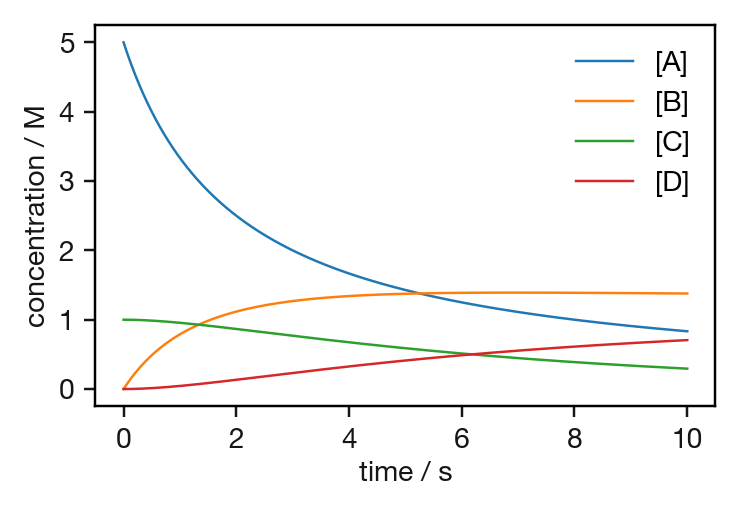

In [5]:
plt.plot(t_stored, A_stored, label='[A]')
plt.plot(t_stored, B_stored, label='[B]')
plt.plot(t_stored, C_stored, label='[C]')
plt.plot(t_stored, D_stored, label='[D]')
plt.xlabel('time / s')
plt.ylabel('concentration / M')
plt.legend()
plt.show()

### Note

The time at which $[\mathrm{B}]$ is a maximum is sensitive to the timestep used in the simulation.

We need to go to quite small timesteps (using this simple integrator) to converge our estimate for the time at which $[\mathrm{B}]$ is a maximum.

We can observe this timestep dependence by:
1. Placing the simulation inside a function
2. Running multiple simulations with a range of timesteps.
3. Plotting $t([\mathrm{B}]_\mathrm{max})$ as a function of $\Delta t$.

In [6]:
def simulation(dt):
    # set up the simulation.

    A0 = 5
    C0 = 1
    B0 = 0
    D0 = 0

    k1 = 0.05
    k2 = 0.1

    t = 0.0

    A = A0
    B = B0
    C = C0
    D = D0

    A_stored = [A]
    B_stored = [B]
    C_stored = [C]
    D_stored = [D]
    t_stored = [t]

    for step in range(int(10/dt)):
        A_t_plus_dt = A + dA_by_dt(A, k1) * dt
        B_t_plus_dt = B + dB_by_dt(A, B, C, k1, k2) * dt
        C_t_plus_dt = C + dC_by_dt(B, C, k2) * dt
        D_t_plus_dt = D + dD_by_dt(B, C, k2) * dt

        # update everything for t → t+Δt

        A = A_t_plus_dt
        B = B_t_plus_dt
        C = C_t_plus_dt
        D = D_t_plus_dt
        t += dt

        A_stored.append(A)
        B_stored.append(B)
        C_stored.append(C)
        D_stored.append(D)
        t_stored.append(t)
        
    return t_stored[np.argmax(B_stored)]

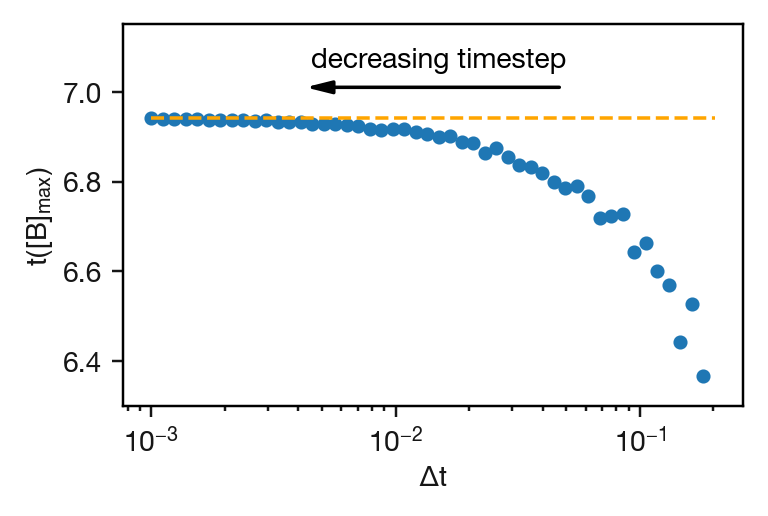

In [7]:
import matplotlib.patches as mpatches

dt = np.logspace(np.log10(0.001), np.log(0.5), base=10)
fig, ax = plt.subplots(1)
plt.semilogx(dt, [simulation(dt=t) for t in dt], 'o', markersize=3)
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'$t([B]_\mathrm{max})$')
arr = mpatches.FancyArrowPatch((0.05, 7.01), (0.004, 7.01),
                               arrowstyle='-|>,head_width=.1', mutation_scale=15, color='black')
ax.add_patch(arr)
ax.annotate("decreasing timestep", (0.51, 1.8), xycoords=arr, ha='center', va='bottom')
plt.hlines(6.941, min(dt), max(dt), linestyle='--', color='orange', linewidth=1)
plt.ylim(6.3, 7.15)
plt.show()